In [5]:
from vivarium.core.composition import simulate_composite
from vivarium.library.units import units
from vivarium.plots.topology import plot_topology

# vivarium-multibody imports
from vivarium_multibody.composites.lattice import (
    Lattice, make_lattice_config)
from vivarium_multibody.composites.grow_divide import GrowDivide
from vivarium_multibody.plots.snapshots import (
    plot_snapshots, format_snapshot_data)


In [4]:
lattice_config = make_lattice_config(
        bounds=[10, 10],
        concentrations={
            'glc': 1.0},
        diffusion=0.001,
        depth=10)

lattice_composer = Lattice(lattice_config)
lattice_composite = lattice_composer.generate()

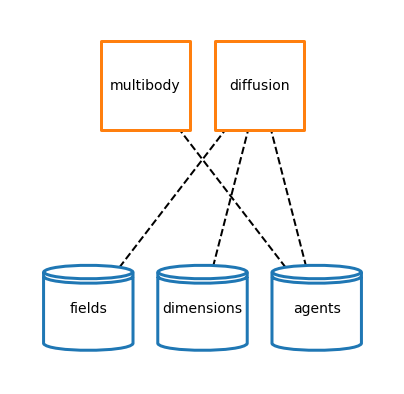

In [8]:
topo_settings = {
    'dashed_edges': True,
    'show_ports': False,
}
topo_plot = plot_topology(
    lattice_composite,
    settings=topo_settings)

In [9]:
growth_config = {
    'default_growth_rate': 0.0005}
grow_divide_composer = GrowDivide({'agent_id': '0', 'growth': growth_config})

agent_id = '0'
grow_divide_composite = grow_divide_composer.generate(path=('agents', agent_id))

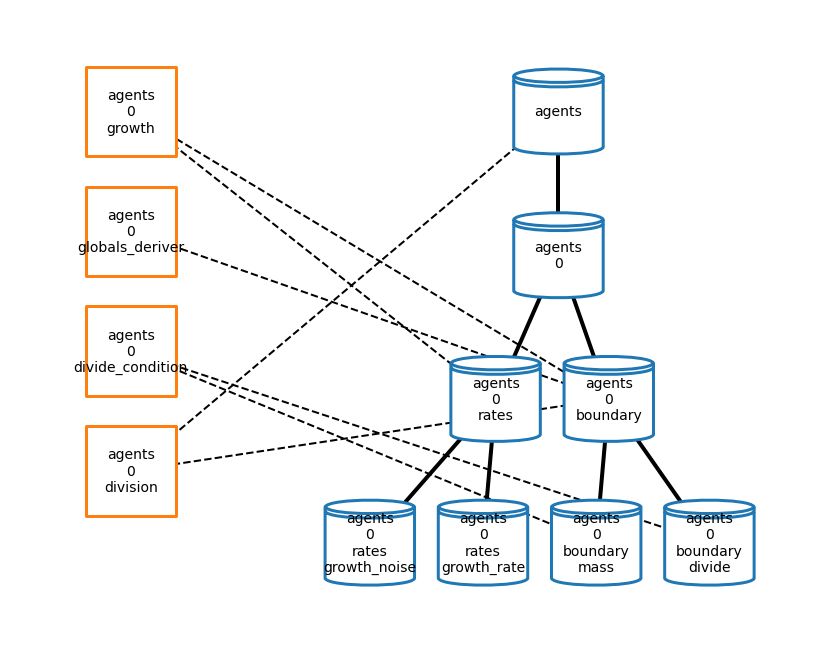

In [11]:
topo_settings = {
    'graph_format': 'hierarchy',
    'dashed_edges': True,
    'show_ports': False,
}
topo_plot = plot_topology(
    grow_divide_composite,
    settings=topo_settings)

In [12]:
lattice_composite.merge(composite=grow_divide_composite)

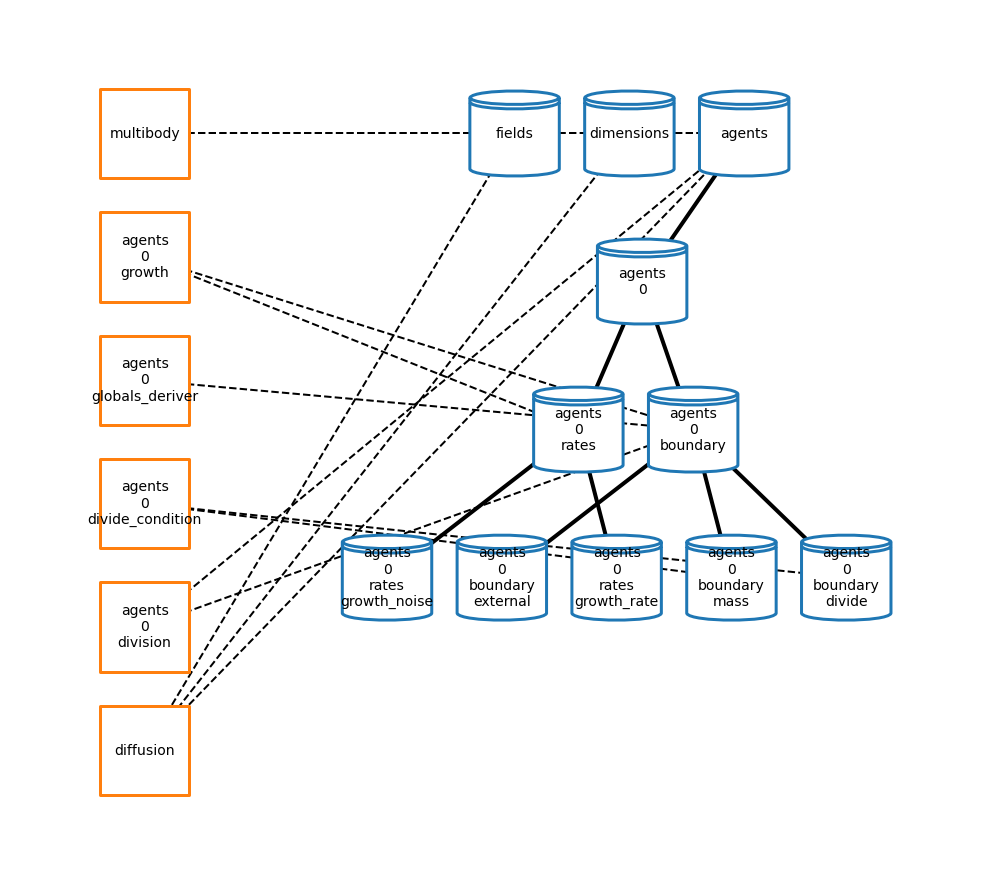

In [13]:
topo_settings = {
    'graph_format': 'hierarchy',
    'dashed_edges': True,
    'show_ports': False,
}
topo_plot = plot_topology(
    lattice_composite,
    settings=topo_settings)